# Interpreting ResNet Model With Integrated Gradients

This notebook loads the pretrained ResNet model given by [PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/release/2.0) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Integrated Gradients algorithm, specifically the `IntGradCVInterpreter` class.

In [6]:
import paddle
import interpretdl as it

If you have't done so, please first download the pretrained ResNet50 model by runnig the cell below or directly from [this link](https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams). 
More pretrained models can be found in [PaddleClas Model Zoo](https://github.com/PaddlePaddle/PaddleClas/tree/e93711c43512a7ebcec07a0438aa87565df81084#Model_zoo_overview).

In [7]:
# load from paddle.vision
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)

Initialize the `IntGradCVInterpreter`. 

In [8]:
ig = it.IntGradCVInterpreter(paddle_model, use_cuda=True)

Before interpreting the image, we first take a look at the original image.

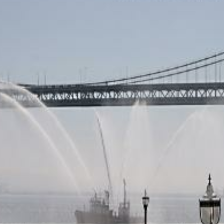

In [9]:
from PIL import Image

from interpretdl.data_processor.readers import read_image

img_path = 'assets/fireboat.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Integrated Gradients method help us `interpret` the image with respect to the predicted label. We choose to choose random baselines and perform 10 random trials. Gradients are overlayed with the original image.

/Users/yuantingyi/opt/anaconda3/envs/paddle2/lib/python3.7/site-packages/paddle/nn/layer/norm.py:641: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


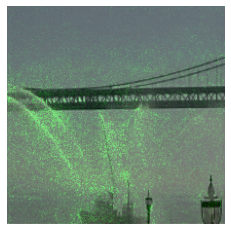

In [10]:
gradients = ig.interpret(
    img_path,
    labels=None,
    baselines='random',
    steps=50,
    num_random_trials=10,
    visual=True,
    save_path=None)

Another choice for visualization is in grayscale:

Note that `IntGradCVInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!